<a href="https://colab.research.google.com/github/GeraldL19/loan_default_prediction/blob/main/Spot_Testing_Model_SMOTE_Hyper__02_01_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.6 MB/s e

In [4]:
# Installed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pycaret.classification as pyc
from pycaret.classification import *

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [5]:
#Import dataset from GoogleDrive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_data.csv", index_col=0)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,21.0,9600.0,2.0,5.0,1.0,1.0,1000.0,11.14,0.10,0.0,2.0,0
2,25.0,9600.0,0.0,1.0,3.0,2.0,5500.0,12.87,0.57,0.0,3.0,1
3,23.0,65500.0,3.0,4.0,3.0,2.0,35000.0,15.23,0.53,0.0,2.0,1
4,24.0,54400.0,3.0,8.0,3.0,2.0,35000.0,14.27,0.55,1.0,4.0,1
5,21.0,9900.0,2.0,2.0,5.0,0.0,2500.0,7.14,0.25,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000.0,0.0,1.0,4.0,2.0,5800.0,13.16,0.11,0.0,30.0,0
32577,54.0,120000.0,0.0,4.0,4.0,0.0,17625.0,7.49,0.15,0.0,19.0,0
32578,65.0,76000.0,3.0,3.0,2.0,1.0,35000.0,10.99,0.46,0.0,28.0,1
32579,56.0,150000.0,0.0,5.0,4.0,1.0,15000.0,11.48,0.10,0.0,26.0,0


In [6]:
#initializing an object of class LabelEncoder
labelencoder= LabelEncoder()
#fitting and transforming the desired categorical column.
df['person_home_ownership'] = labelencoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = labelencoder.fit_transform(df['loan_intent'])
df['loan_grade'] = labelencoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = labelencoder.fit_transform(df['cb_person_default_on_file'])

In [7]:
cols_to_norm = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','person_income','person_income','person_income']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [8]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [9]:
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)

# Basic PyCaret

In [10]:
model = setup(data = df, target = 'loan_status', session_id=123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32408, 12)"
4,Transformed data shape,"(32408, 12)"
5,Transformed train set shape,"(22685, 12)"
6,Transformed test set shape,"(9723, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9346,0.9441,0.7196,0.9746,0.8279,0.7886,0.8025,1.4050
xgboost,Extreme Gradient Boosting,0.9337,0.9435,0.7365,0.9487,0.8291,0.7888,0.7986,0.2630
rf,Random Forest Classifier,0.9289,0.9266,0.7017,0.9631,0.8117,0.7692,0.7840,3.5950
gbc,Gradient Boosting Classifier,0.9231,0.9270,0.6918,0.9410,0.7972,0.7512,0.7648,2.4830
et,Extra Trees Classifier,0.9210,0.9173,0.6845,0.9372,0.7910,0.7437,0.7578,1.7990
ada,Ada Boost Classifier,0.8861,0.8962,0.6487,0.7930,0.7135,0.6433,0.6485,0.7720
knn,K Neighbors Classifier,0.8855,0.8581,0.6029,0.8267,0.6971,0.6286,0.6406,0.9820
dt,Decision Tree Classifier,0.8809,0.8342,0.7513,0.7180,0.7341,0.6575,0.6579,0.3700
lr,Logistic Regression,0.8442,0.8483,0.4618,0.7260,0.5643,0.4751,0.4933,1.3970
lda,Linear Discriminant Analysis,0.8413,0.8474,0.4785,0.7005,0.5684,0.4754,0.4885,0.0740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
F2 = (5 * 0.9746 * 0.7196) / (4 * 0.9746 + 0.7196)
F2

0.7593353832828064

*   We can clearly see that the class imbalance is creating a bias towards the majority class. This means that few of the smaller class prediction a accurate. This is the accuracy paradox
*   We will explore multiple solution in order to fix this issue.



# PyCaret with Smote

In [11]:
from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

X = df.drop('loan_status', axis=1)
y = df['loan_status']

over_sampling = SMOTE(sampling_strategy=0.5)

X_train_smote, y_train_smote = over_sampling.fit_resample(X, y)

# Create a DataFrame with the SMOTE-transformed features and target
df_smote = pd.concat([pd.DataFrame(X_train_smote, columns=X.columns), pd.Series(y_train_smote, name='target')], axis=1)

In [12]:
df_smote

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,target
0,-1.085359,-1.071942,2,0.056243,1,1,-1.359400,0.040048,-0.657826,0,-0.939438,0
1,-0.440148,-1.071942,0,-0.941728,3,2,-0.647472,0.577113,3.743601,0,-0.692901,1
2,-0.762753,-0.007532,3,-0.193250,3,2,4.019613,1.309757,3.369012,0,-0.939438,1
3,-0.601451,-0.218891,3,0.804721,3,2,4.019613,1.011732,3.556307,1,-0.446365,1
4,-1.085359,-1.066230,2,-0.692235,5,0,-1.122091,-1.201722,0.746885,0,-0.939438,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37975,-0.854735,-0.890279,2,-0.692235,1,0,-0.001835,-1.092400,3.098131,0,-0.472853,1
37976,0.043760,-0.552114,3,-0.222602,0,2,0.380869,0.991280,1.457504,0,0.815323,1
37977,-0.924056,-0.449454,3,-0.370028,0,1,1.359203,0.167734,2.410420,0,-0.446365,1
37978,-0.083331,-0.232281,3,-1.032469,3,2,2.182016,0.769587,2.486460,0,1.032855,1


In [13]:
# Setup PyCaret with the SMOTE-transformed dataset
exp = setup(data=df_smote, target='target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(37980, 12)"
4,Transformed data shape,"(37980, 12)"
5,Transformed train set shape,"(26586, 12)"
6,Transformed test set shape,"(11394, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [14]:
# Compare models and select the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9326,0.9651,0.8116,0.9832,0.8891,0.8413,0.8493,1.8880
xgboost,Extreme Gradient Boosting,0.9321,0.9667,0.8240,0.9676,0.8900,0.8413,0.8470,0.4050
et,Extra Trees Classifier,0.9191,0.9585,0.8053,0.9439,0.8690,0.8111,0.8165,2.3930
rf,Random Forest Classifier,0.9179,0.9603,0.7797,0.9678,0.8636,0.8059,0.8155,3.4350
gbc,Gradient Boosting Classifier,0.8961,0.9392,0.7469,0.9275,0.8273,0.7543,0.7634,3.6000
dt,Decision Tree Classifier,0.8705,0.8569,0.8162,0.7996,0.8078,0.7101,0.7103,0.1440
ada,Ada Boost Classifier,0.8638,0.9076,0.7415,0.8319,0.7839,0.6849,0.6875,1.1120
knn,K Neighbors Classifier,0.8630,0.9152,0.7768,0.8053,0.7908,0.6890,0.6893,0.8910
lda,Linear Discriminant Analysis,0.7995,0.8469,0.6065,0.7449,0.6684,0.5269,0.5328,0.0840
lr,Logistic Regression,0.7994,0.8472,0.6122,0.7410,0.6703,0.5280,0.5331,0.6200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [16]:
# Evaluate the best model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
F2 = (5 * 0.9832 * 0.8116) / (4 * 0.9832 + 0.8116)
F2

0.8409547255711997

# PyCaret with Smote and Tomek Links

In [18]:
from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

X = df.drop('loan_status', axis=1)
y = df['loan_status']

smt = SMOTETomek(random_state=42)

X_train_smote, y_train_smote = smt.fit_resample(X, y)

# Create a DataFrame with the SMOTE-transformed features and target
df_smtek = pd.concat([pd.DataFrame(X_train_smote, columns=X.columns), pd.Series(y_train_smote, name='target')], axis=1)

In [20]:
# Setup PyCaret with the SMOTE-transformed dataset
exp = setup(data=df_smtek, target='target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(50166, 12)"
4,Transformed data shape,"(50166, 12)"
5,Transformed train set shape,"(35116, 12)"
6,Transformed test set shape,"(15050, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [21]:
# Compare models and select the best one
best_tek = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9522,0.9857,0.9195,0.9839,0.9506,0.9044,0.9063,0.3990
lightgbm,Light Gradient Boosting Machine,0.9506,0.9837,0.9133,0.9869,0.9487,0.9012,0.9037,2.3370
et,Extra Trees Classifier,0.9353,0.9830,0.9162,0.9527,0.9341,0.8707,0.8713,2.9510
rf,Random Forest Classifier,0.9347,0.9836,0.8977,0.9695,0.9322,0.8694,0.8718,4.8610
gbc,Gradient Boosting Classifier,0.8947,0.9597,0.8480,0.9355,0.8895,0.7894,0.7930,6.0170
dt,Decision Tree Classifier,0.8850,0.8850,0.8928,0.8791,0.8859,0.7700,0.7701,0.1930
knn,K Neighbors Classifier,0.8719,0.9456,0.9182,0.8405,0.8776,0.7438,0.7471,0.9410
ada,Ada Boost Classifier,0.8588,0.9277,0.8357,0.8761,0.8554,0.7176,0.7184,1.6550
lr,Logistic Regression,0.7824,0.8543,0.7821,0.7826,0.7823,0.5648,0.5648,0.1940
ridge,Ridge Classifier,0.7821,0.0000,0.7769,0.7852,0.7809,0.5642,0.5643,0.0880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [22]:
# Evaluate the best model
evaluate_model(best_tek)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
F2 = (5 * 0.9839 * 0.9195) / (4 * 0.9839 + 0.9195)
F2

0.9316966179893309

# PyCaret lightGBM with Smote and Tomek - hyper param tuning

In [35]:
from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

X = df.drop('loan_status', axis=1)
y = df['loan_status']

smt = SMOTETomek(random_state=42)

X_train_smote, y_train_smote = smt.fit_resample(X, y)

# Create a DataFrame with the SMOTE-transformed features and target
df_smtek = pd.concat([pd.DataFrame(X_train_smote, columns=X.columns), pd.Series(y_train_smote, name='target')], axis=1)

In [36]:
# Setup PyCaret with the SMOTE-transformed dataset
exp = setup(data=df_smtek, target='target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(50166, 12)"
4,Transformed data shape,"(50166, 12)"
5,Transformed train set shape,"(35116, 12)"
6,Transformed test set shape,"(15050, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [37]:
# train model
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9544,0.9840,0.9203,0.9878,0.9528,0.9089,0.9110
1,0.9473,0.9840,0.9049,0.9888,0.9450,0.8946,0.8979
2,0.9539,0.9837,0.9169,0.9902,0.9521,0.9077,0.9102
3,0.9519,0.9870,0.9123,0.9907,0.9499,0.9038,0.9066
4,0.9527,0.9834,0.9169,0.9877,0.9510,0.9055,0.9078
5,0.9462,0.9834,0.9083,0.9827,0.9441,0.8924,0.8949
6,0.9487,0.9816,0.9112,0.9852,0.9467,0.8975,0.9000
7,0.9462,0.9807,0.9095,0.9816,0.9441,0.8923,0.8948
8,0.9482,0.9818,0.9054,0.9900,0.9458,0.8963,0.8996


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
tuned_lgbm = tune_model(lgbm, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9564,0.9852,0.9277,0.9843,0.9551,0.9129,0.9144
1,0.9516,0.9848,0.9180,0.9841,0.9499,0.9032,0.9052
2,0.9542,0.9855,0.9277,0.9796,0.9529,0.9083,0.9096
3,0.9542,0.9873,0.9208,0.9866,0.9526,0.9083,0.9103
4,0.9539,0.9864,0.9243,0.9824,0.9525,0.9077,0.9093
5,0.9502,0.9848,0.9180,0.9811,0.9485,0.9003,0.9022
6,0.9493,0.9834,0.9180,0.9793,0.9477,0.8986,0.9004
7,0.9482,0.9838,0.9169,0.9781,0.9465,0.8963,0.8981
8,0.9479,0.9822,0.9151,0.9793,0.9461,0.8958,0.8977


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Evaluate the best model
evaluate_model(best_tek)

In [39]:
# Get the configuration settings, including hyperparameters, of the best model
best_model_config = get_config('model')
print("Best Model Configuration:")
print(best_model_config)

lightgbm.sklearn.LGBMClassifier

In [41]:
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# PyCaret with Smote and Under Sampling

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [24]:
# Define SMOTE and Undersampling techniques
oversample = SMOTE()
undersample = RandomUnderSampler()

# Create a pipeline
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

# Initialize PyCaret
exp = setup(df, target='loan_status', session_id=123, preprocess=pipeline)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32408, 12)"
4,Transformed data shape,"(32408, 12)"
5,Transformed train set shape,"(22685, 12)"
6,Transformed test set shape,"(9723, 12)"
7,Numeric features,11
8,Preprocess,"Pipeline(memory=None, steps=[('o', SMOTE(k_neighbors=5, n_jobs=None, random_state=None, sampling_strategy='auto')), ('u', RandomUnderSampler(random_state=None, replacement=False, sampling_strategy='auto'))], verbose=False)"
9,Imputation type,simple


In [25]:
# Create a model using PyCaret
smunder = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9346,0.9441,0.7196,0.9746,0.8279,0.7886,0.8025,1.0030
xgboost,Extreme Gradient Boosting,0.9337,0.9435,0.7365,0.9487,0.8291,0.7888,0.7986,0.3600
rf,Random Forest Classifier,0.9289,0.9266,0.7017,0.9631,0.8117,0.7692,0.7840,2.5720
gbc,Gradient Boosting Classifier,0.9231,0.9270,0.6918,0.9410,0.7972,0.7512,0.7648,2.3920
et,Extra Trees Classifier,0.9210,0.9173,0.6845,0.9372,0.7910,0.7437,0.7578,1.7950
ada,Ada Boost Classifier,0.8861,0.8962,0.6487,0.7930,0.7135,0.6433,0.6485,0.9060
knn,K Neighbors Classifier,0.8855,0.8581,0.6029,0.8267,0.6971,0.6286,0.6406,0.4950
dt,Decision Tree Classifier,0.8809,0.8342,0.7513,0.7180,0.7341,0.6575,0.6579,0.1670
lr,Logistic Regression,0.8442,0.8483,0.4618,0.7260,0.5643,0.4751,0.4933,0.0790
lda,Linear Discriminant Analysis,0.8413,0.8474,0.4785,0.7005,0.5684,0.4754,0.4885,0.0770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [26]:
# Evaluate the best model
evaluate_model(smunder)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
F2 = (5 * 0.9746 * 0.7196) / (4 * 0.9746 + 0.7196)
F2

0.7593353832828064

# RF balanced

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your misclassification costs or use 'balanced' to automatically assign weights
class_weights = 'balanced'  # Adjust the weights based on your specific costs

# Create a Random Forest classifier with cost-sensitive learning
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7598
           1       0.97      0.70      0.82      2125

    accuracy                           0.93      9723
   macro avg       0.95      0.85      0.89      9723
weighted avg       0.93      0.93      0.93      9723



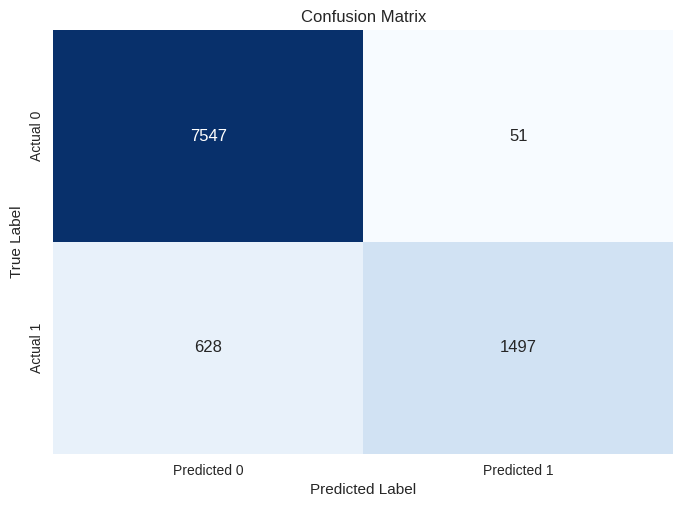

In [29]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
F2 = (5 * 0.93 * 0.93) / (4 * 0.93 + 0.93)
F2

0.93

#Decision Trees Balanced

In [31]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your misclassification costs or use 'balanced' to automatically assign weights
class_weights = 'balanced'  # Adjust the weights based on your specific costs

# Create a Decision Tree classifier with cost-sensitive learning
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5071
           1       0.74      0.76      0.75      1411

    accuracy                           0.89      6482
   macro avg       0.84      0.84      0.84      6482
weighted avg       0.89      0.89      0.89      6482



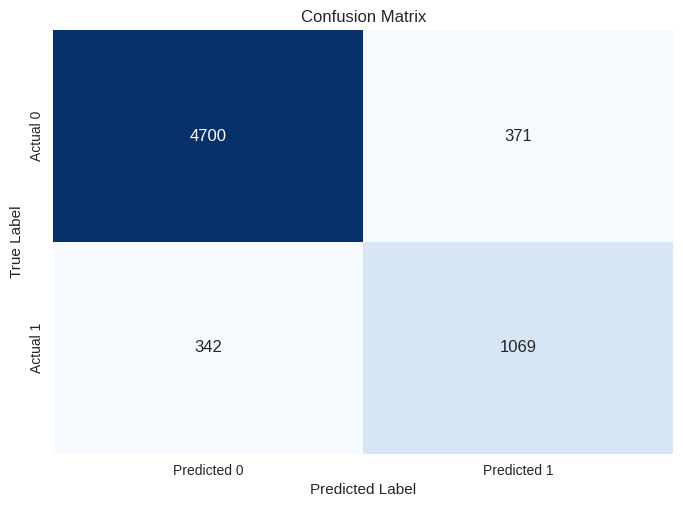

In [32]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#SKLearn Basic

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, f1_score

from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [34]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to try
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Accuracy for {model_name}: {accuracy}')
    print(f'Recall for {model_name}: {recall}\n')

Training and evaluating Random Forest...
Accuracy for Random Forest: 0.9309883780726114
Recall for Random Forest: 0.712

Training and evaluating Decision Tree...
Accuracy for Decision Tree: 0.8893345675203127
Recall for Decision Tree: 0.7656470588235295

Training and evaluating SVM...
Accuracy for SVM: 0.8845006685179472
Recall for SVM: 0.5675294117647058

Training and evaluating XGBoost...
Accuracy for XGBoost: 0.9354108814152011
Recall for XGBoost: 0.7463529411764706

Training and evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.9225547670472076
Recall for Gradient Boosting: 0.6945882352941176

Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 4963, number of negative: 17722
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 22685, number of use

# SKLearn with Smote

In [35]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Setting SMOTE
over_sampling = SMOTE()

#Applying smote to training set
X_smote, y_smote = over_sampling.fit_resample(X, y)

# Split the data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# List of models to try
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Make predictions on the test set
    y_pred_smote = model.predict(X_test_smote)

    # Evaluate the model
    accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
    recall_smote = recall_score(y_test_smote, y_pred_smote)
    f1_smote = f1_score(y_test_smote, y_pred_smote)
    f2_smote = fbeta_score(y_test_smote, y_pred_smote, beta=2)

    print(f'Accuracy for {model_name}: {accuracy_smote}')
    print(f'Recall for {model_name}: {recall_smote}')
    print(f'F1 Score for {model_name}: {f1_smote}')
    print(f'F2 Score for {model_name}: {f2_smote}\n')

Training and evaluating Random Forest...
Accuracy for Random Forest: 0.9350315955766193
Recall for Random Forest: 0.8991962050336013
F1 Score for Random Forest: 0.9325589340621797
F2 Score for Random Forest: 0.9122506817817229

Training and evaluating Decision Tree...
Accuracy for Decision Tree: 0.884807793575566
Recall for Decision Tree: 0.889577019370141
F1 Score for Decision Tree: 0.8852609493836874
F2 Score for Decision Tree: 0.887845550908756

Training and evaluating SVM...
Accuracy for SVM: 0.8253686150605581
Recall for SVM: 0.7775728027408091
F1 Score for SVM: 0.8164648910411623
F2 Score for SVM: 0.7926763741873086

Training and evaluating XGBoost...
Accuracy for XGBoost: 0.9507635597682991
Recall for XGBoost: 0.9173804190275399
F1 Score for XGBoost: 0.9490185387131952
F2 Score for XGBoost: 0.9297791073479527

Training and evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.892509215376514
Recall for Gradient Boosting: 0.8445117933851627
F1 Score for Gradient Boost

# SKLearn with Smote and Tomek

In [36]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Setting SMOTETomek
smt = SMOTETomek(random_state=42)

#Applying smotetomek to training set
X_smote_tek, y_smote_tek = smt.fit_resample(X, y)

# Split the data into training and testing sets
X_train_tek, X_test_tek, y_train_tek, y_test_tek = train_test_split(X_smote_tek, y_smote_tek, test_size=0.3, random_state=42)

# List of models to try
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train_tek, y_train_tek)

    # Make predictions on the test set
    y_pred_tek = model.predict(X_test_tek)

    # Evaluate the model
    accuracy_tek= accuracy_score(y_test_tek, y_pred_tek)
    recall_tek = recall_score(y_test_tek, y_pred_tek)
    f1_tek = f1_score(y_test_tek, y_pred_tek)
    f2_tek = fbeta_score(y_test_tek, y_pred_tek, beta=2)

    print(f'Accuracy for {model_name}: {accuracy_tek}')
    print(f'Recall for {model_name}: {recall_tek}')
    print(f'F1 Score for {model_name}: {f1_tek}')
    print(f'F2 Score for {model_name}: {f2_tek}\n')

Training and evaluating Random Forest...
Accuracy for Random Forest: 0.9348172757475083
Recall for Random Forest: 0.9009250569781472
F1 Score for Random Forest: 0.9319742042854171
F2 Score for Random Forest: 0.9130931028860263

Training and evaluating Decision Tree...
Accuracy for Decision Tree: 0.8820598006644518
Recall for Decision Tree: 0.8880546990213165
F1 Score for Decision Tree: 0.8818478333222393
F2 Score for Decision Tree: 0.8855614973262032

Training and evaluating SVM...
Accuracy for SVM: 0.8218604651162791
Recall for SVM: 0.7745006032980293
F1 Score for SVM: 0.8116613979627678
F2 Score for SVM: 0.7889489784770022

Training and evaluating XGBoost...
Accuracy for XGBoost: 0.9482392026578073
Recall for XGBoost: 0.9132591500201099
F1 Score for XGBoost: 0.9459140456849269
F2 Score for XGBoost: 0.926046764545949

Training and evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.8869102990033223
Recall for Gradient Boosting: 0.8364392009652768
F1 Score for Gradient Bo

# Hyperparameter Tuning

# XGBoost with Smote and RendomizedSearchCV

In [37]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Setting SMOTE
over_sampling = SMOTE()

#Applying smote to training set
X_smote, y_smote = over_sampling.fit_resample(X, y)

# Split the data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=3, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train_smote, y_train_smote)

# Get the best model
best_xgb = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test_smote)

# Evaluate the model
accuracy = accuracy_score(y_test_smote, y_pred)
print(f'Best Model Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_smote, y_pred))

Best Model Accuracy: 0.9525408109531333
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7603
           1       0.99      0.92      0.95      7589

    accuracy                           0.95     15192
   macro avg       0.95      0.95      0.95     15192
weighted avg       0.95      0.95      0.95     15192



# XGBoost with Smote and Tomek, and RendomizedSearchCV

In [44]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Setting SMOTETomek
smt = SMOTETomek(random_state=42)

#Applying smotetomek to training set
X_smote_tek, y_smote_tek = smt.fit_resample(X, y)

# Split the data into training and testing sets
X_train_tek, X_test_tek, y_train_tek, y_test_tek = train_test_split(X_smote_tek, y_smote_tek, test_size=0.3, random_state=42)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=3, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train_tek, y_train_tek)

# Get the best model
best_xgb = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test_tek)

# Evaluate the model
accuracy = accuracy_score(y_test_tek, y_pred)
print(f'Best Model Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_tek, y_pred))

Best Model Accuracy: 0.9519601328903654
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7591
           1       0.98      0.92      0.95      7459

    accuracy                           0.95     15050
   macro avg       0.95      0.95      0.95     15050
weighted avg       0.95      0.95      0.95     15050



# XGBoost with Smote and Tomek, and GridSearchCV

In [53]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Setting SMOTETomek
smt = SMOTETomek(random_state=42)

#Applying smotetomek to training set
X_smote_tek, y_smote_tek = smt.fit_resample(X, y)

# Split the data into training and testing sets
X_train_tek, X_test_tek, y_train_tek, y_test_tek = train_test_split(X_smote_tek, y_smote_tek, test_size=0.3, random_state=42)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define a smaller hyperparameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=3)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_tek, y_train_tek)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test_tek)

# Evaluate the model
accuracy = accuracy_score(y_test_tek, y_pred)
print(f'Best Model Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_tek, y_pred))

Best Model Accuracy: 0.9429900332225913
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7591
           1       0.98      0.90      0.94      7459

    accuracy                           0.94     15050
   macro avg       0.95      0.94      0.94     15050
weighted avg       0.95      0.94      0.94     15050



# LightGBM with Smote and Tomek, and RendomizedSearchCV - **BEST**

In [31]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Setting SMOTETomek
smt = SMOTETomek(random_state=42)

#Applying smotetomek to training set
X_smote_tek, y_smote_tek = smt.fit_resample(X, y)

# Split the data into training and testing sets
X_train_tek, X_test_tek, y_train_tek, y_test_tek = train_test_split(X_smote_tek, y_smote_tek, test_size=0.3, random_state=42)

# Create a LightGBM classifier
lgbm_classifier = LGBMClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_samples': [5, 10, 20],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(lgbm_classifier, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=3, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train_tek, y_train_tek)



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11749, number of negative: 11661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1804
[LightGBM] [Info] Number of data points in the train set: 23410, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501880 -> initscore=0.007518
[LightGBM] [Info] Start training from score 0.007518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=None,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, su...
                   n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1],
                                        'subsample': [0.8, 0.9, 1.0]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [33]:
# Get the best model
best_lgbm = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_lgbm.predict(X_test_tek)

# Evaluate the model
accuracy = accuracy_score(y_test_tek, y_pred)
print(f'Best Model Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_tek, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Best Model Accuracy: 0.9554152823920266
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7591
           1       0.99      0.92      0.95      7459

    accuracy                           0.96     15050
   macro avg       0.96      0.96      0.96     15050
weighted avg       0.96      0.96      0.96     15050



In [34]:
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


# Random Forest with Smote and Tomek, and RendomizedSearchCV

In [28]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Setting SMOTETomek
smt = SMOTETomek(random_state=42)

#Applying smotetomek to training set
X_smote_tek, y_smote_tek = smt.fit_resample(X, y)

# Split the data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_tek, y_smote_tek, test_size=0.3, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist,
                                   n_iter=10, scoring='accuracy', cv=3, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_smote)

# Evaluate the model
accuracy = accuracy_score(y_test_smote, y_pred)
print(f'Best Model Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_smote, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 60}
Best Model Accuracy: 0.9318936877076412
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7591
           1       0.96      0.90      0.93      7459

    accuracy                           0.93     15050
   macro avg       0.93      0.93      0.93     15050
weighted avg       0.93      0.93      0.93     15050



# Banalanced Random Forest with RendomizedSearchCV

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import classification_report

In [27]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your misclassification costs or use 'balanced' to automatically assign weights
class_weights = 'balanced'  # Adjust the weights based on your specific costs

# Create a RandomForestClassifier with cost-sensitive learning
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist,
                                   n_iter=10, scoring='accuracy', cv=3, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 60}
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7598
           1       0.90      0.74      0.81      2125

    accuracy                           0.93      9723
   macro avg       0.92      0.86      0.88      9723
weighted avg       0.92      0.93      0.92      9723



https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/

**Spot Check Imbalanced Algorithms**

Data Oversampling
*   SMOTE
*   ????

Combined Oversampling and Undersampling
*   SMOTE and Random Undersampling
*   SMOTE and Tomek Links

Cost-Sensitive Algorithms
*   Decision Trees
*   Support Vector Machines
*   Artificial Neural Networks
*   Bagged Decision Trees
*   Random Forest
*   Stochastic Gradient Boosting

**Hyperparameter Tuning**

*   Random Search
*   Grid Search
*   Bayesian Optimization